In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.api import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data=pd.read_excel("Student_data.xlsx")
data.head()

,StudentID,school2,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3,4,1,1,3,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3,3,1,1,3,4,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3,2,2,3,3,10,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2,2,1,1,5,2,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3,2,1,2,5,4,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
StudentID      395 non-null int64
school2        395 non-null object
sex            395 non-null object
age            395 non-null int64
address        395 non-null object
famsize        395 non-null object
Pstatus        395 non-null object
Medu           395 non-null int64
Fedu           395 non-null int64
Mjob           395 non-null object
Fjob           395 non-null object
reason         395 non-null object
guardian       395 non-null object
traveltime     395 non-null int64
studytime      395 non-null int64
failures       395 non-null int64
schoolsup      395 non-null object
famsup         395 non-null object
paid           395 non-null object
activities     395 non-null object
nursery        395 non-null object
higher         395 non-null object
internet       395 non-null object
romantic       395 non-null object
famrel         395 non-null int64
freetime       395 non-null 

In [4]:
data.isnull().values.any() # No NAs in the data!

False

In [5]:
data.describe()

,StudentID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,99.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,198.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,296.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,395.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [6]:
data_numeric = data.select_dtypes(exclude=["object"])
data_categoric = data.select_dtypes(include=["object"])
data_numeric.drop("StudentID", axis=1, inplace=True)     # Drop studentId column (not needed for predictions)

/Users/martin/Library/Python/3.7/lib/python/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
#let's see categories and number of observations in each category for object variables
for i in data_categoric.columns:
    j=data[i].value_counts()
    print(i,"\n",j,"\n","\n")
    print("--------------------")
    
# Number of categories is satisfactory (no need for shrinking or transforming)
# Only few categories per each column

school2 
 GP    349
MS     46
Name: school2, dtype: int64 
 

--------------------
sex 
 F    208
M    187
Name: sex, dtype: int64 
 

--------------------
address 
 U    307
R     88
Name: address, dtype: int64 
 

--------------------
famsize 
 GT3    281
LE3    114
Name: famsize, dtype: int64 
 

--------------------
Pstatus 
 T    354
A     41
Name: Pstatus, dtype: int64 
 

--------------------
Mjob 
 other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64 
 

--------------------
Fjob 
 other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64 
 

--------------------
reason 
 course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64 
 

--------------------
guardian 
 mother    273
father     90
other      32
Name: guardian, dtype: int64 
 

--------------------
schoolsup 
 no     344
yes     51
Name: schoolsup, dtype: int64 
 

---------------

## Correlation

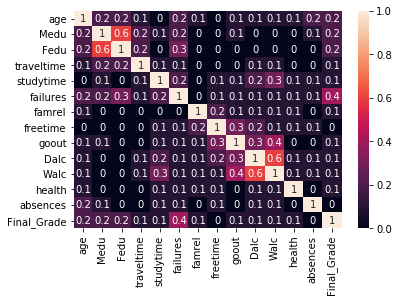

In [8]:
# Correlation between numeric values
sns.heatmap(data_numeric.corr().abs().round(1), annot=True)
plt.show()

## OLS Model with all variables

Some of the variables definitely affect the score but using all the variables without modifying those is definitely not going to lead to the best result

In [9]:
data_new=data_numeric.join(data_categoric,how='outer')

In [10]:
model=ols(formula='Final_Grade~' + '+'.join([col for col in data_new.columns.tolist() if col != 'Final_Grade']), 
          data=data_new)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.463
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           3.32e-10
Time:                        11:45:30   Log-Likelihood:                -1097.5
No. Observations:                 395   AIC:                             2275.
Df Residuals:                     355   BIC:                             2434.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               14.0777      4.481      3.142      0.002       5.265      22.890
school2[T.MS]            0.7256      0.792      0.917      0.360      -0.831       2.282
sex[T.M]                 1.2624      0.500      2.525      0.012       0.279       2.246
address[T.U]             0.5513      0.584      0.944      0.346      -0.597       1.700
famsize[T.LE3]           0.7028      0.488      1.439      0.151      -0.257       1.663
Pstatus[T.T]            -0.3201      0.724     -0.442      0.659      -1.744       1.104
Mjob[T.health]           0.9981      1.118      0.893      0.373      -1.201       3.197
Mjob[T.other]           -0.3590      0.713     -0.503      0.615      -1.762       1.044
Mjob[T.services]         0.6583      0.798      0.825      0.410      -0.911       2.227
Mjob[T.teacher]         -1.2415      1.038     -1.196      0.233      -3.283       0.800
Fjob[T.health]           0.3477      1.438      0.242      0.809      -2.480       3.176
Fjob[T.other]           -0.6197      1.023     -0.606      0.545      -2.632       1.392
Fjob[T.services]        -0.4658      1.057     -0.441      0.660      -2.544       1.613
Fjob[T.teacher]          1.3262      1.297      1.023      0.307      -1.224       3.876
reason[T.home]           0.0785      0.554      0.142      0.887      -1.011       1.168
reason[T.other]          0.7771      0.818      0.950      0.343      -0.831       2.385
reason[T.reputation]     0.6130      0.577      1.063      0.288      -0.521       1.747
guardian[T.mother]       0.0698      0.546      0.128      0.898      -1.003       1.143
guardian[T.other]        0.7501      0.999      0.751      0.453      -1.216       2.716
schoolsup[T.yes]        -1.3506      0.667     -2.025      0.044      -2.662      -0.039
famsup[T.yes]           -0.8618      0.479     -1.800      0.073      -1.803       0.080
paid[T.yes]              0.3397      0.478      0.711      0.477      -0.600       1.279
activities[T.yes]       -0.3295      0.445     -0.741      0.459      -1.205       0.546
nursery[T.yes]          -0.1773      0.549     -0.323      0.747      -1.258       0.903
higher[T.yes]            1.3705      1.078      1.272      0.204      -0.749       3.490
internet[T.yes]          0.4981      0.620      0.804      0.422      -0.720       1.717
romantic[T.yes]         -1.0945      0.469     -2.332      0.020      -2.017      -0.172
age                     -0.3752      0.217     -1.727      0.085      -0.802       0.052
Medu                     0.4569      0.323      1.414      0.158      -0.179       1.092
Fedu                    -0.1046      0.278     -0.377      0.707      -0.651       0.441
traveltime              -0.2403      0.339     -0.709      0.479      -0.907       0.426
studytime                0.5495      0.288      1.910    

As we can see, the modes doesn't perform good enough. R-squared is pretty low and log-likelihood is a huge number in terms of the absolute value. In addition the adjusted R-squared is far from the R-squared which means there are variables which can be excluded.

## Now lets transform some variables and exclude unnecessary ones or those which have high correlation

(array([ 82., 104.,  98.,   0.,  82.,  24.,   0.,   3.,   1.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <a list of 10 Patch objects>)

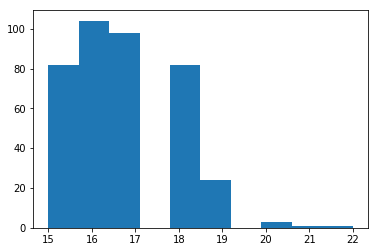

In [11]:
plt.hist(data.age)

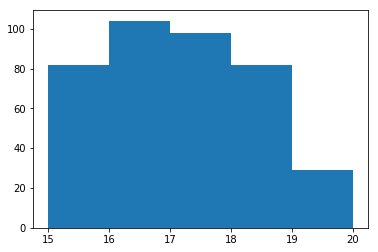

In [12]:
# Transform age to a categorical variable
data_new.age = data.age
data_new.age = data_new.age.transform(func=lambda x: x if x < 20 else 20)
plt.hist(data_new.age, bins=5)
data_new.age = pd.cut(data_new.age, bins=5)

(array([118.,  73.,  58.,  38.,  25.,  20.,  15.,  15.,   8.,  25.]),
 array([-0.91094719, -0.55972792, -0.20850865,  0.14271061,  0.49392988,
         0.84514915,  1.19636841,  1.54758768,  1.89880695,  2.25002621,
         2.60124548]),
 <a list of 10 Patch objects>)

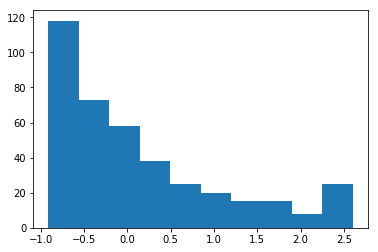

In [13]:
# Transform and normalize absences
data_new.absences = data.absences
data_new.absences = data_new.absences.transform(func=lambda x: x if x < 20 else 20)
data_new.absences = (data_new.absences - data_new.absences.mean()) / data_new.absences.std()
plt.hist(data_new.absences)

In [14]:
# Transform and scale other numeric variables
# Medu	Fedu	traveltime	studytime	failures	famrel	freetime	goout	Dalc	Walc	health
# for col in ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']:
#     data_new[col] = (data[col] - data[col].mean()) / data[col].std()

In [15]:
data_new.describe()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,3.950000e+02,395.000000
mean,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,-4.497106e-17,10.415190
std,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,1.000000e+00,4.581443
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.109472e-01,0.000000
25%,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,-9.109472e-01,8.000000
50%,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,-2.085087e-01,11.000000
75%,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,4.939299e-01,14.000000
max,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.601245e+00,20.000000


In [16]:
model=ols(formula='Final_Grade~' + '+'.join([col for col in data_new.columns.tolist() if col != 'Final_Grade']), 
          data=data_new)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.525
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           5.60e-11
Time:                        11:45:33   Log-Likelihood:                -1091.8
No. Observations:                 395   AIC:                             2270.
Df Residuals:                     352   BIC:                             2441.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       9.1700      2.457      3.732      0.000       4.338      14.002
age[T.Interval(16.0, 17.0, closed='right')]    -0.9201      0.560     -1.642      0.102      -2.022       0.182
age[T.Interval(17.0, 18.0, closed='right')]    -1.5270      0.636     -2.401      0.017      -2.778      -0.276
age[T.Interval(18.0, 19.0, closed='right')]    -1.7932      1.295     -1.385      0.167      -4.340       0.753
age[T.Interval(19.0, 20.0, closed='right')]     2.4818      2.338      1.062      0.289      -2.116       7.079
school2[T.MS]                                   0.7473      0.798      0.936      0.350      -0.822       2.317
sex[T.M]                                        1.2221      0.496      2.462      0.014       0.246       2.198
address[T.U]                                    0.4056      0.581      0.699      0.485      -0.736       1.548
famsize[T.LE3]                                  0.7769      0.485      1.600      0.110      -0.178       1.732
Pstatus[T.T]                                   -0.1462      0.720     -0.203      0.839      -1.562       1.270
Mjob[T.health]                                  0.7881      1.120      0.704      0.482      -1.415       2.991
Mjob[T.other]                                  -0.3704      0.709     -0.522      0.602      -1.765       1.024
Mjob[T.services]                                0.4560      0.797      0.572      0.567      -1.111       2.023
Mjob[T.teacher]                                -1.3145      1.032     -1.274      0.203      -3.344       0.715
Fjob[T.health]                                  0.1507      1.428      0.106      0.916      -2.658       2.960
Fjob[T.other]                                  -0.8103      1.025     -0.790      0.430      -2.827       1.206
Fjob[T.services]                               -0.5077      1.051     -0.483      0.629      -2.575       1.560
Fjob[T.teacher]                                 1.1601      1.292      0.898      0.370      -1.380       3.700
reason[T.home]                                  0.2249      0.554      0.406      0.685      -0.865       1.315
reason[T.other]                                 0.7360      0.818      0.899      0.369      -0.873       2.345
reason[T.reputation]                            0.6768      0.575      1.178      0.240      -0.453       1.807
guardian[T.mother]                              0.0752      0.540      0.139      0.889      -0.986       1.136
guardian[T.other]                               0.3420      1.199      0.285      0.776      -2.016       2.700
schoolsup[T.yes]                               -1.4465      0.661     -2.187      0.029      -2.747      -0.146
famsup[T.yes]                                  -0.8942     

## Remove some variables

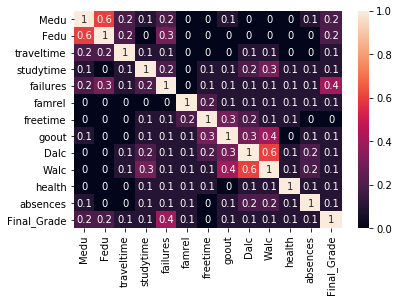

In [17]:
# Lets try to omit some variables
sns.heatmap(data_new.select_dtypes(exclude=["object"]).corr().abs().round(1), annot=True)
plt.show()

In [29]:
model=ols(formula='Final_Grade~' + '+'.join([col for col in data_new.columns.tolist() if col not in {'Final_Grade', 'traveltime', 'reason', 'Walc', 'nursery', 'health', 'famrel', 'Fedu', 'Fjob', 'guardian'}]), 
          data=data_new)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     5.198
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           3.59e-14
Time:                        11:49:48   Log-Likelihood:                -1097.2
No. Observations:                 395   AIC:                             2250.
Df Residuals:                     367   BIC:                             2362.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       9.0318      1.754      5.150      0.000       5.583      12.481
age[T.Interval(16.0, 17.0, closed='right')]    -0.8299      0.544     -1.525      0.128      -1.900       0.241
age[T.Interval(17.0, 18.0, closed='right')]    -1.4849      0.623     -2.383      0.018      -2.710      -0.260
age[T.Interval(18.0, 19.0, closed='right')]    -1.4547      0.983     -1.480      0.140      -3.388       0.479
age[T.Interval(19.0, 20.0, closed='right')]     2.7726      2.049      1.353      0.177      -1.258       6.803
school2[T.MS]                                   0.6648      0.755      0.880      0.379      -0.820       2.150
sex[T.M]                                        1.1839      0.480      2.469      0.014       0.241       2.127
address[T.U]                                    0.4123      0.542      0.761      0.447      -0.653       1.478
famsize[T.LE3]                                  0.7064      0.473      1.493      0.136      -0.224       1.636
Pstatus[T.T]                                   -0.2016      0.706     -0.286      0.775      -1.589       1.186
Mjob[T.health]                                  0.8255      1.037      0.796      0.426      -1.213       2.864
Mjob[T.other]                                  -0.4898      0.671     -0.730      0.466      -1.809       0.830
Mjob[T.services]                                0.4741      0.754      0.629      0.530      -1.008       1.956
Mjob[T.teacher]                                -1.2125      0.982     -1.235      0.218      -3.144       0.719
schoolsup[T.yes]                               -1.3023      0.649     -2.007      0.045      -2.578      -0.027
famsup[T.yes]                                  -0.9298      0.460     -2.022      0.044      -1.834      -0.026
paid[T.yes]                                     0.3759      0.455      0.827      0.409      -0.518       1.270
activities[T.yes]                              -0.3468      0.430     -0.806      0.421      -1.193       0.499
higher[T.yes]                                   0.9619      1.034      0.930      0.353      -1.072       2.996
internet[T.yes]                                 0.6535      0.601      1.088      0.277      -0.528       1.835
romantic[T.yes]                                -1.0445      0.454     -2.300      0.022      -1.938      -0.151
Medu                                            0.4840      0.261      1.853      0.065      -0.030       0.998
studytime                                       0.6096      0.273      2.229      0.026       0.072       1.147
failures                                       -1.9114      0.328     -5.836      0.000      -2.556      -1.267
freetime                                        0.2474     

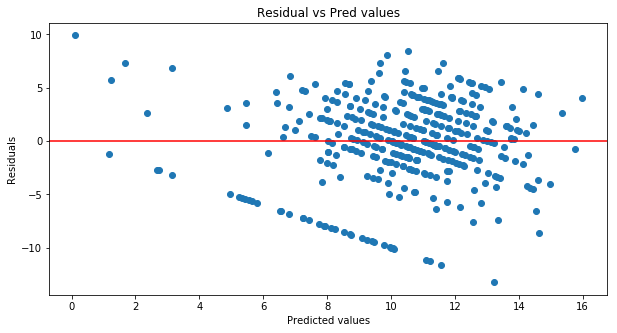

In [30]:
residuals=results.resid
residuals.head(10)


pred_values=results.predict()
true_values=data_new.Final_Grade
resid=true_values-pred_values

plt.figure(figsize=(10,5))
plt.scatter(pred_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residual vs Pred values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

(array([  4.,  12.,  16.,  22.,  50., 112.,  89.,  63.,  24.,   3.]),
 array([-13.23519834, -10.92164837,  -8.60809839,  -6.29454842,
         -3.98099845,  -1.66744848,   0.6461015 ,   2.95965147,
          5.27320144,   7.58675141,   9.90030139]),
 <a list of 10 Patch objects>)

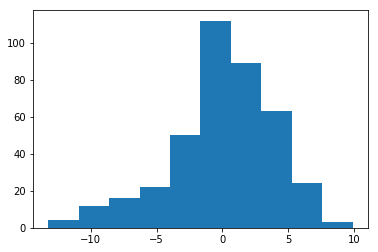

In [33]:
plt.hist(residuals)

In [31]:
# Resisuals are distributed randomly above and below the line => the fit is good => Errors are from normal distribution

/Users/martin/Library/Python/3.7/lib/python/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


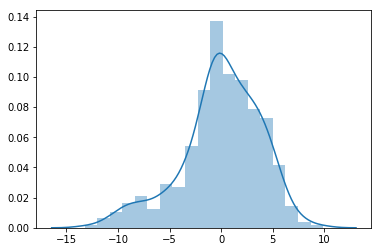

In [34]:
sns.distplot(residuals)

In [35]:
# Kind of a normal distribution (not perfect though)

In [41]:
# Multicolinearity
my_list=['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
       'absences']

vif = [variance_inflation_factor(data_new[my_list].values, i) for i in range(0,4)]
print(vif)

#printing VIF values for each X variable
for i in range(0,4):
    print(my_list[i],":",vif[i])

[4.726451245968365, 5.838848261277807, 1.2705669117051746, 14.284637287193213]
traveltime : 4.726451245968365
studytime : 5.838848261277807
failures : 1.2705669117051746
famrel : 14.284637287193213


In [42]:
# Famrel > 10 => multicolinear

## Model with categorical labels instead of numeric

In [37]:
data_new.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Final_Grade', 'school2', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [43]:
from statsmodels.discrete.discrete_model import MNLogit

cat_data = data_new
cat_data.Final_Grade = cat_data.Final_Grade.astype('category')
model=MNLogit.from_formula(formula='Final_Grade~' + '+'.join([col for col in cat_data.columns.tolist() if col != 'Final_Grade']), 
          data=cat_data)
results=model.fit(method='minimize')
results.summary()

         Current function value: 1.659637
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


/Users/martin/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  395
Model:                        MNLogit   Df Residuals:                     -336
Method:                           MLE   Df Model:                          714
Date:                Wed, 20 Feb 2019   Pseudo R-squ.:                  0.3627
Time:                        12:00:02   Log-Likelihood:                -655.56
converged:                      False   LL-Null:                       -1028.6
                                        LLR p-value:                    0.1968
===============================================================================================================
                           y=Final_Grade[4]       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -0.1649     56.369     -0.003      0.998    -110.647     110.317
age[T.Interval(16.0, 17.0, closed='right')]     0.4551     12.639      0.036      0.971     -24.318      25.228
age[T.Interval(17.0, 18.0, closed='right')]    -0.1490     15.188     -0.010      0.992     -29.917      29.619
age[T.Interval(18.0, 19.0, closed='right')]    -0.0475     30.773     -0.002      0.999     -60.361      60.266
age[T.Interval(19.0, 20.0, closed='right')]    -0.0519     33.658     -0.002      0.999     -66.020      65.916
school2[T.MS]                                  -0.1021     14.654     -0.007      0.994     -28.824      28.620
sex[T.M]                                       -0.3941     11.677     -0.034      0.973     -23.281      22.493
address[T.U]                                    0.0165     14.243      0.001      0.999     -27.900      27.933
famsize[T.LE3]                                 -0.2288      9.593     -0.024      0.981     -19.030      18.573
Pstatus[T.T]                                   -0.0884     14.667     -0.006      0.995     -28.836      28.659
Mjob[T.health]                                 -0.0615     22.899     -0.003      0.998     -44.942      44.819
Mjob[T.other]                                   0.3319     15.056      0.022      0.982     -29.177      29.841
Mjob[T.services]                               -0.2218     16.833     -0.013      0.989     -33.214      32.771
Mjob[T.teacher]                                -0.0923     23.252     -0.004      0.997     -45.666      45.481
Fjob[T.health]                                 -0.0260     32.728     -0.001      0.999     -64.171      64.119
Fjob[T.other]                                   0.2068     21.630      0.010      0.992     -42.187      42.600
Fjob[T.services]                               -0.2486     22.504     -0.011      0.991     -44.356      43.859
Fjob[T.teacher]                                -0.0537     28.855     -0.002      0.999     -56.608      56.500
reason[T.home]                                 -0.2113     12.217     -0.017      0.986     -24.157      23.735
reason[T.other]                                -0.1127     19.712     -0.006      0.995     -38.747      38.521
reason[T.reputation]                            0.4327     11.569      0.037      0.970     -22.242      23.107
guardian[T.mother]                              0.0770     13.948      0.006      0.996     -27.260      27.414
guardian[T.other]                              -0.0600     28.635     -0.002      0.998     -56.183      56.063
schoolsup[T.yes]                               -0.0866     18.615     -0.005      0.996     -36.571      36.397
famsup[T.yes]                                  -0.4670      8.929     -0.052      0.958     -17.968      17.034
paid[T.yes]                                     0.2965     11.377      0.026      0.979     -22.002      

In [ ]:
# Pseudo R-squared is higher than the R-squared obtained before

In [ ]:
data_new.describe()